In [59]:
import pandas as pd

In [60]:
data = pd.read_csv("./data/spam.csv",encoding='latin1')

In [61]:
data_copy = data.copy()

In [62]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4111,ham,"I'll see, but prolly yeah",NaN,NaN,NaN
2775,ham,We confirm eating at esplanade?,NaN,NaN,NaN
2918,ham,Is xy in ur car when u picking me up?,NaN,NaN,NaN
2210,ham,Just wanted to say holy shit you guys weren't ...,NaN,NaN,NaN
1689,ham,Bring tat cd don forget,NaN,NaN,NaN


In [63]:
data.shape

(5572, 5)

In [64]:
 data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [65]:
data.duplicated().sum()

np.int64(403)

In [66]:
data.drop_duplicates(inplace=True)

In [67]:
data.duplicated().sum()

np.int64(0)

In [68]:
new_df = data[['v1','v2']].copy()

In [69]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
new_df.iloc[2].v2

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [71]:
new_df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [72]:
new_df.sample(5)

,target,text
1595,ham,Pls confirm the time to collect the cheque.
5430,ham,If you can make it any time tonight or wheneve...
2052,spam,Call 09094100151 to use ur mins! Calls cast 10...
1715,ham,Asking do u knw them or nt? May be ur frnds or...
3135,ham,Can you let me know details of fri when u find...


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
encoder = LabelEncoder()

In [75]:
new_df['target'] = encoder.fit_transform(new_df['target'])

In [76]:
new_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [77]:
new_df.duplicated().sum()

np.int64(0)

In [78]:
new_df.isna().sum()

target    0
text      0
dtype: int64

<h1>EDA</h1

In [79]:
import matplotlib.pyplot as plt

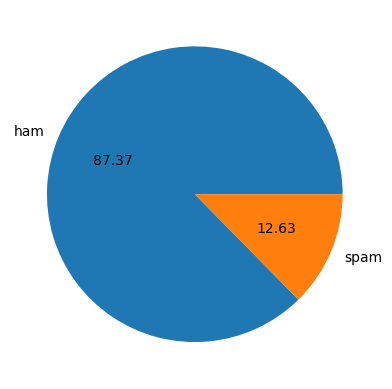

In [80]:
plt.pie(new_df['target'].value_counts() , labels=['ham','spam'],autopct = '%0.2f')
plt.show()

In [81]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [82]:
new_df['num_characters'] = new_df['text'].apply(len)

In [83]:
new_df.sample()

,target,text,num_characters
3882,0,Gumby's has a special where a &lt;#&gt; \ che...,96


In [84]:
new_df['num_words'] = new_df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [85]:
new_df['num_sentences'] = new_df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [86]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

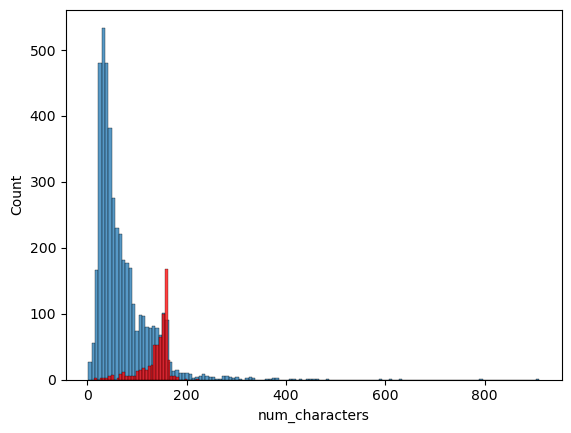

In [87]:
sns.histplot(new_df[new_df['target'] == 0]['num_characters'])
sns.histplot(new_df[new_df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

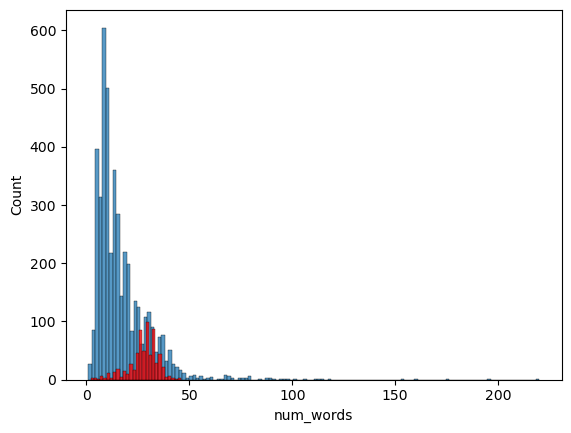

In [88]:
sns.histplot(new_df[new_df['target'] == 0]['num_words'])
sns.histplot(new_df[new_df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

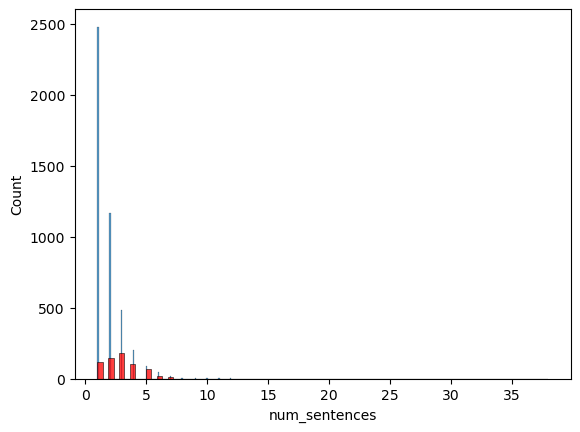

In [89]:
sns.histplot(new_df[new_df['target'] == 0]['num_sentences'])
sns.histplot(new_df[new_df['target'] == 1]['num_sentences'],color='red')

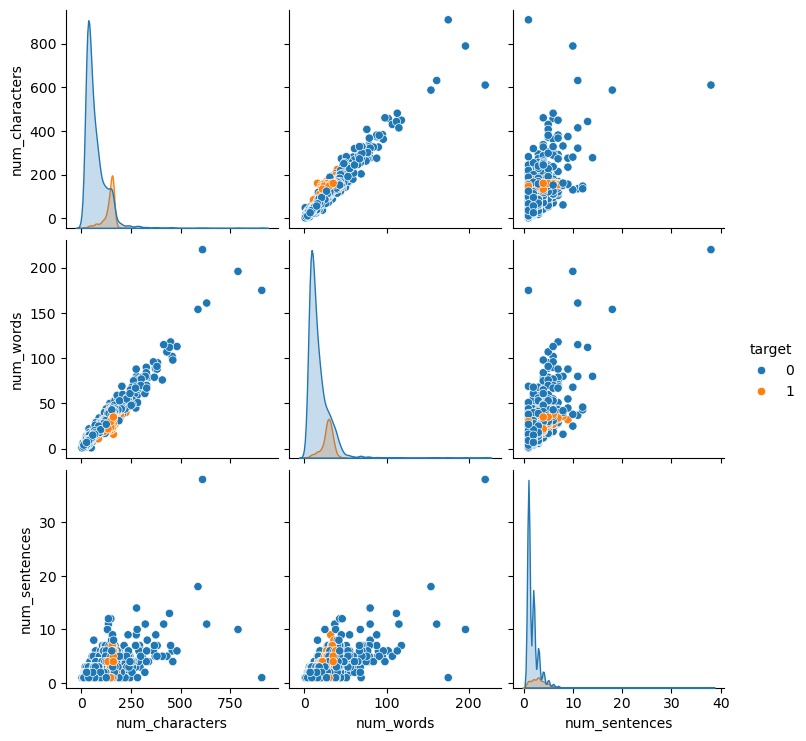

In [90]:
sns.pairplot(new_df,hue='target')

<Axes: >

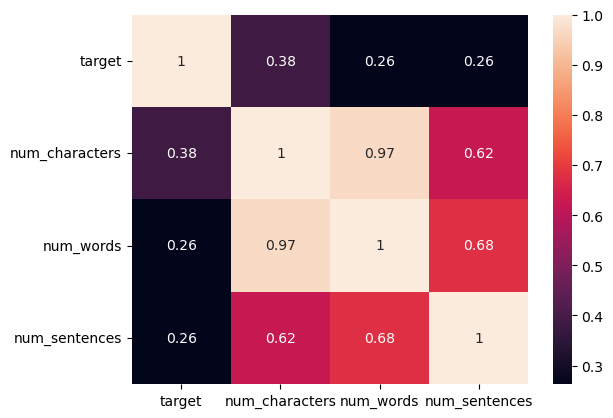

In [91]:
numeric_df = new_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)


In [92]:
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [93]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    text = l.copy()
    l.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(ps.stem(i))
    return " ".join(l)
            
    

In [94]:
transform_text('I loved the YT lectures on Machine Learning?')

'love yt lectur machin learn'

In [95]:
new_df['text'] = new_df['text'].apply(transform_text)

In [96]:
new_df['text'].sample(5)

3009    imagin life without see fast u search worri l ...
1742    calm downon theacus itxt u co iwana know wotu ...
3635         2 babe feel let 4get tri fit soo muchxxlov u
3749    buzz hey love think hope day goe well sleep mi...
1227                           submit da project tmr rite
Name: text, dtype: object

In [97]:
new_df['text'][2745]

'r go 4 today meet'

In [98]:
!pip install wordcloud

In [99]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')

In [100]:
spam_wc = wc.generate(new_df[new_df['target'] == 1]['text'].str.cat(sep=' '))

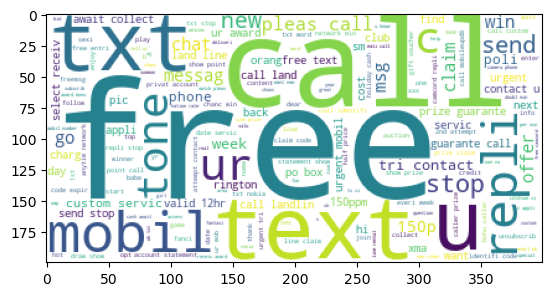

In [101]:
plt.imshow(spam_wc)

In [102]:
ham_wc = wc.generate(new_df[new_df['target'] == 0]['text'].str.cat(sep=' '))

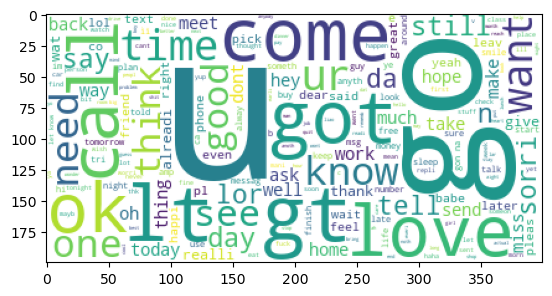

In [103]:
plt.imshow(ham_wc)

In [104]:
spam_corpas = []

for msg in new_df[new_df['target']==1]['text'].tolist():
    for word in msg.split():
        spam_corpas.append(word)

In [105]:
len(spam_corpas)

9939

In [106]:
from collections import Counter

In [107]:
pd.DataFrame(Counter(spam_corpas).most_common(10))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


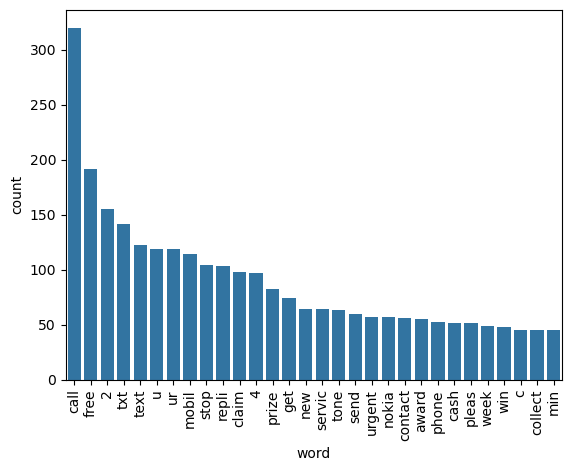

In [108]:
most_common_df = pd.DataFrame(Counter(spam_corpas).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

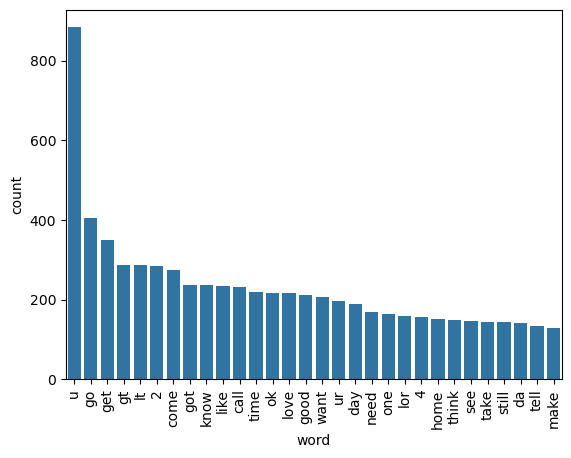

In [109]:
ham_corpas = []

for msg in new_df[new_df['target']==0]['text'].tolist():
    for word in msg.split():
        ham_corpas.append(word)

most_common_ham_word = pd.DataFrame(Counter(ham_corpas).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_ham_word)
plt.xticks(rotation='vertical')
plt.show()

<h1>Model building<h1>

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer()

In [111]:
X = tfv.fit_transform(new_df['text']).toarray()

In [112]:
X.shape 

(5169, 6708)

In [113]:
y = new_df['target'].values

In [114]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [120]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [121]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [122]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [123]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766
